In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_data_1 = pd.read_parquet('cicids2017/Benign-Monday-no-metadata.parquet')
df_data_2 = pd.read_parquet('cicids2017/Botnet-Friday-no-metadata.parquet')
df_data_3 = pd.read_parquet('cicids2017/Bruteforce-Tuesday-no-metadata.parquet')
df_data_4 = pd.read_parquet('cicids2017/DDoS-Friday-no-metadata.parquet')
df_data_5 = pd.read_parquet('cicids2017/DoS-Wednesday-no-metadata.parquet')
df_data_7 = pd.read_parquet('cicids2017/Portscan-Friday-no-metadata.parquet')
df_data_8 = pd.read_parquet('cicids2017/WebAttacks-Thursday-no-metadata.parquet')

In [4]:
data = pd.concat([df_data_1, df_data_2, df_data_3, df_data_4, 
                    df_data_5, df_data_7, df_data_8], axis=0, ignore_index=True)

In [5]:
null_counts = data.isnull().sum()
# Print the number of null values
print(f"{null_counts.sum()} null entries have been found in the dataset\n")
# Drop null values
data.dropna(inplace=True)          # or df_data = df_data.dropna()

# Find and handle duplicates
duplicate_count = data.duplicated().sum()
# Print the number of duplicate entries
print(f"{duplicate_count} duplicate entries have been found in the dataset\n")
# Remove duplicates
data.drop_duplicates(inplace=True)  # or df_data = df_data.drop_duplicates()
# Display relative message
print(f"All duplicates have been removed\n")

# Reset the indexes
data.reset_index(drop=True, inplace=True)

# Inspect the dataset for categorical columns
print("Categorical columns:",data.select_dtypes(include=['object']).columns.tolist(),'\n')

# Print the first 5 lines
data.head()

0 null entries have been found in the dataset

61963 duplicate entries have been found in the dataset

All duplicates have been removed

Categorical columns: ['Label'] 



,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,4,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,6,1,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,6,3,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,6,1,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,6,609,7,4,484,414,233,0,69.14286,111.967896,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [6]:
data.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

In [7]:
drop_columns = [ # this list includes all spellings across CIC NIDS datasets
    "Flow ID",    
    'Fwd Header Length.1',
    "Source IP", "Src IP",
    "Source Port", "Src Port",
    "Destination IP", "Dst IP",
    "Destination Port", "Dst Port",
    "Timestamp",
]
data.drop(columns=drop_columns, inplace=True, errors='ignore')  

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044217 entries, 0 to 2044216
Data columns (total 78 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Protocol                  int8   
 1   Flow Duration             int32  
 2   Total Fwd Packets         int32  
 3   Total Backward Packets    int32  
 4   Fwd Packets Length Total  int32  
 5   Bwd Packets Length Total  int32  
 6   Fwd Packet Length Max     int16  
 7   Fwd Packet Length Min     int16  
 8   Fwd Packet Length Mean    float32
 9   Fwd Packet Length Std     float32
 10  Bwd Packet Length Max     int16  
 11  Bwd Packet Length Min     int16  
 12  Bwd Packet Length Mean    float32
 13  Bwd Packet Length Std     float32
 14  Flow Bytes/s              float64
 15  Flow Packets/s            float64
 16  Flow IAT Mean             float32
 17  Flow IAT Std              float32
 18  Flow IAT Max              int32  
 19  Flow IAT Min              int32  
 20  Fwd IAT Total           

In [9]:
data['Label'].value_counts()

Benign                        1707761
DoS Hulk                       172846
DDoS                           128014
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
PortScan                         1956
Web Attack � Brute Force         1470
Bot                              1437
Web Attack � XSS                  652
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [10]:
def change_label(df):
  df['Label'].replace(['DoS Hulk','DoS GoldenEye','DoS slowloris','DoS Slowhttptest'],'Dos',inplace=True)
  df['Label'].replace(['FTP-Patator','SSH-Patator','Infiltration','Heartbleed'],'Bot',inplace=True)      
  df['Label'].replace(['Web Attack � XSS','Web Attack � Sql Injection'],'WebAttack',inplace=True)
  df['Label'].replace(['Web Attack � Brute Force'],'BruteForce',inplace=True)

In [11]:
change_label(data)

In [12]:
# distribution of attack classes
data['Label'].value_counts()

Benign        1707761
Dos            193745
DDoS           128014
Bot             10598
PortScan         1956
BruteForce       1470
WebAttack         673
Name: Label, dtype: int64

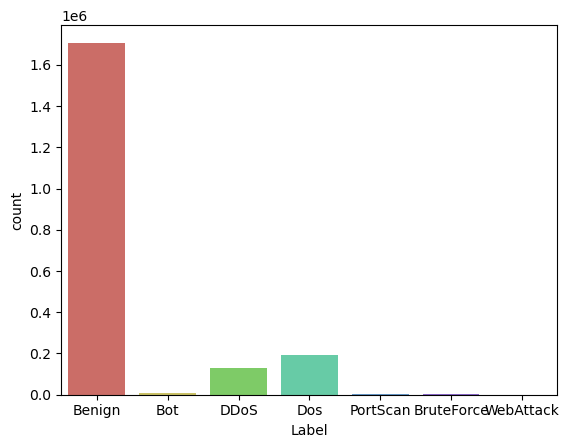

In [13]:
sns.countplot(x='Label',data=data, palette='hls')
plt.show()
#plt.savefig('count_plot') mal: the nodule malignancy, 0: benign, 1: malignant

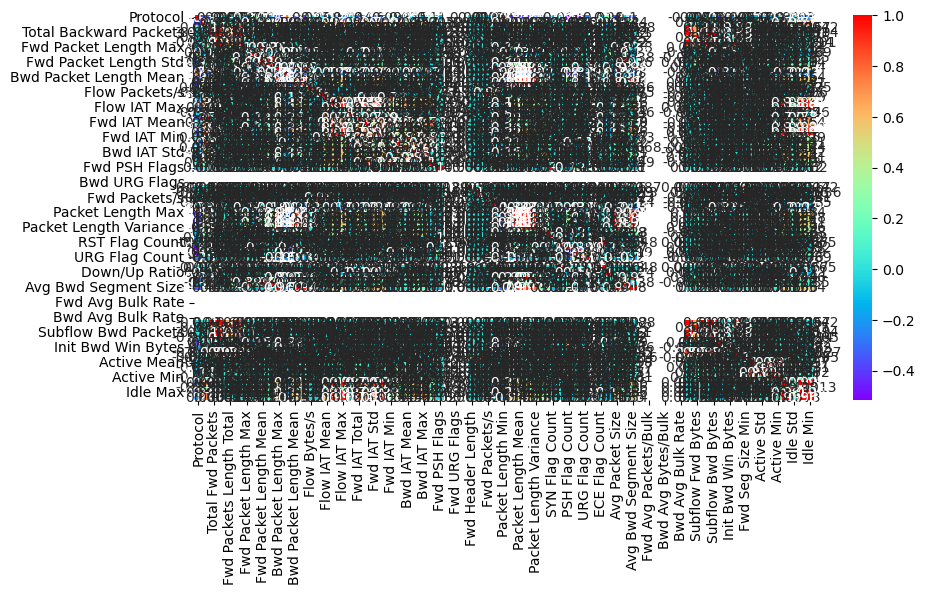

In [14]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap="rainbow")
plt.show()

In [15]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Label']= label_encoder.fit_transform(data['Label'])

data['Label'].unique()

array([0, 4, 3, 1, 5, 2, 6])

In [17]:
X = data.drop(["Label"],axis =1)
y = data["Label"]

# FS

In [27]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel 

In [29]:
regressor = Lasso(alpha=5000,
                               positive=True,
                               fit_intercept=False, 
                               max_iter=1000,
                               tol=0.0001)
regressor.fit(X,y)

Lasso(alpha=5000, fit_intercept=False, positive=True)

In [32]:
import eli5
eli5.show_weights(regressor, top=-1, feature_names = X.columns.tolist())

Weight?,Feature
+0.000,Init Bwd Win Bytes
+0.000,Init Fwd Win Bytes
+0.000,Flow Packets/s
+0.000,Packet Length Variance
+0.000,Flow Bytes/s
+0.000,Flow IAT Mean
+0.000,Idle Mean
+0.000,Idle Max
+0.000,Bwd IAT Min
+0.000,Idle Min


In [34]:
df = data[['Init Bwd Win Bytes','Init Fwd Win Bytes','Flow Packets/s',
           'Packet Length Variance','Flow Bytes/s','Flow IAT Mean',
           'Idle Mean','Idle Max','Bwd IAT Min','Idle Min','Label']]

In [35]:
df.to_csv('processed.csv')

In [16]:
df = pd.read_csv('processed.csv')

In [17]:
del df['Unnamed: 0']

In [18]:
df.columns

Index(['Init Bwd Win Bytes', 'Init Fwd Win Bytes', 'Flow Packets/s',
       'Packet Length Variance', 'Flow Bytes/s', 'Flow IAT Mean', 'Idle Mean',
       'Idle Max', 'Bwd IAT Min', 'Idle Min', 'Label'],
      dtype='object')

In [19]:
X = df[['Init Bwd Win Bytes', 'Init Fwd Win Bytes', 'Flow Packets/s',
       'Packet Length Variance', 'Flow Bytes/s', 'Flow IAT Mean', 'Idle Mean',
       'Idle Max', 'Bwd IAT Min', 'Idle Min']]
y = df["Label"]

# SMOTE

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_oversampled, y_oversampled = sm.fit_resample(X, y)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size = 0.20, random_state = 42)
#X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [22]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [23]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# With HPO

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=4,n_estimators=200,min_samples_split=2)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [25]:
storeResults('With HPO - RF',rf_acc,rf_prec,rf_rec,rf_f1)

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5,min_samples_split=2)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [27]:
 storeResults('With HPO - DT',dt_acc,dt_prec,dt_rec,dt_f1)

# LightGBM

In [34]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=200,num_leaves=31,learning_rate=0.05,max_depth=-1)
lgbm.fit(X_train, y_train)

y_pred    = lgbm.predict(X_test)

lgbm_acc = accuracy_score(y_pred, y_test)
lgbm_prec = precision_score(y_pred, y_test,average='weighted')
lgbm_rec = recall_score(y_pred, y_test,average='weighted')
lgbm_f1 = f1_score(y_pred, y_test,average='weighted')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2502
[LightGBM] [Info] Number of data points in the train set: 10953, number of used features: 10
[LightGBM] [Info] Start training from score -1.963781
[LightGBM] [Info] Start training from score -1.962481
[LightGBM] [Info] Start training from score -1.960533
[LightGBM] [Info] Start training from score -1.936189
[LightGBM] [Info] Start training from score -1.927994
[LightGBM] [Info] Start training from score -1.938089
[LightGBM] [Info] Start training from score -1.933029


In [29]:
 storeResults('With HPO - LightGBM',lgbm_acc,lgbm_prec,lgbm_rec,lgbm_f1)

# XGBoost

In [30]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=6,learning_rate=0.1,n_estimators=300)
xgb.fit(X_train, y_train)

y_pred    = xgb.predict(X_test)

xgb_acc = accuracy_score(y_pred, y_test)
xgb_prec = precision_score(y_pred, y_test,average='weighted')
xgb_rec = recall_score(y_pred, y_test,average='weighted')
xgb_f1 = f1_score(y_pred, y_test,average='weighted')

In [31]:
storeResults('With HPO - XGBoost',xgb_acc,xgb_prec,xgb_rec,xgb_f1)

# CatBoost

In [32]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(depth=8,learning_rate=0.1,iterations=300)
cat.fit(X_train, y_train)

y_pred    = cat.predict(X_test)

cat_acc = accuracy_score(y_pred, y_test)
cat_prec = precision_score(y_pred, y_test,average='weighted')
cat_rec = recall_score(y_pred, y_test,average='weighted')
cat_f1 = f1_score(y_pred, y_test,average='weighted')

0:	learn: 1.5991700	total: 196ms	remaining: 58.5s
1:	learn: 1.4025513	total: 237ms	remaining: 35.2s
2:	learn: 1.2394175	total: 274ms	remaining: 27.1s
3:	learn: 1.1070549	total: 314ms	remaining: 23.3s
4:	learn: 1.0069224	total: 355ms	remaining: 20.9s
5:	learn: 0.9221004	total: 395ms	remaining: 19.4s
6:	learn: 0.8469166	total: 437ms	remaining: 18.3s
7:	learn: 0.7806895	total: 480ms	remaining: 17.5s
8:	learn: 0.7291213	total: 522ms	remaining: 16.9s
9:	learn: 0.6836115	total: 565ms	remaining: 16.4s
10:	learn: 0.6436964	total: 608ms	remaining: 16s
11:	learn: 0.6073919	total: 652ms	remaining: 15.6s
12:	learn: 0.5753867	total: 701ms	remaining: 15.5s
13:	learn: 0.5485713	total: 742ms	remaining: 15.2s
14:	learn: 0.5210144	total: 784ms	remaining: 14.9s
15:	learn: 0.4976330	total: 826ms	remaining: 14.7s
16:	learn: 0.4774765	total: 867ms	remaining: 14.4s
17:	learn: 0.4597239	total: 910ms	remaining: 14.3s
18:	learn: 0.4427446	total: 951ms	remaining: 14.1s
19:	learn: 0.4281213	total: 993ms	remaining

165:	learn: 0.2041419	total: 7.18s	remaining: 5.8s
166:	learn: 0.2040837	total: 7.22s	remaining: 5.75s
167:	learn: 0.2039754	total: 7.27s	remaining: 5.71s
168:	learn: 0.2036142	total: 7.31s	remaining: 5.67s
169:	learn: 0.2033302	total: 7.35s	remaining: 5.62s
170:	learn: 0.2032687	total: 7.4s	remaining: 5.58s
171:	learn: 0.2031425	total: 7.44s	remaining: 5.54s
172:	learn: 0.2030908	total: 7.48s	remaining: 5.49s
173:	learn: 0.2029966	total: 7.53s	remaining: 5.45s
174:	learn: 0.2027679	total: 7.57s	remaining: 5.41s
175:	learn: 0.2026334	total: 7.61s	remaining: 5.36s
176:	learn: 0.2023328	total: 7.66s	remaining: 5.32s
177:	learn: 0.2021445	total: 7.7s	remaining: 5.28s
178:	learn: 0.2016992	total: 7.76s	remaining: 5.24s
179:	learn: 0.2012453	total: 7.8s	remaining: 5.2s
180:	learn: 0.2011322	total: 7.84s	remaining: 5.16s
181:	learn: 0.2009202	total: 7.88s	remaining: 5.11s
182:	learn: 0.2008380	total: 7.92s	remaining: 5.07s
183:	learn: 0.2007696	total: 7.96s	remaining: 5.02s
184:	learn: 0.200

In [33]:
storeResults('With HPO - CatBoost',cat_acc,cat_prec,cat_rec,cat_f1)

# RF + DT

In [35]:
from sklearn.ensemble import VotingClassifier

clf = VotingClassifier(estimators= [('RF', rf),('DT', dt)], voting='soft')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [36]:
storeResults('With HPO - RF + DT',vot_acc,vot_prec,vot_rec,vot_f1)

# Without HPO

# Random Forest

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [38]:
storeResults('Without HPO - RF',rf_acc,rf_prec,rf_rec,rf_f1)

# DecisionTree

In [39]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [40]:
 storeResults('Without HPO - DT',dt_acc,dt_prec,dt_rec,dt_f1)

# LightGBM

In [41]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

y_pred    = lgbm.predict(X_test)

lgbm_acc = accuracy_score(y_pred, y_test)
lgbm_prec = precision_score(y_pred, y_test,average='weighted')
lgbm_rec = recall_score(y_pred, y_test,average='weighted')
lgbm_f1 = f1_score(y_pred, y_test,average='weighted')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2502
[LightGBM] [Info] Number of data points in the train set: 10953, number of used features: 10
[LightGBM] [Info] Start training from score -1.963781
[LightGBM] [Info] Start training from score -1.962481
[LightGBM] [Info] Start training from score -1.960533
[LightGBM] [Info] Start training from score -1.936189
[LightGBM] [Info] Start training from score -1.927994
[LightGBM] [Info] Start training from score -1.938089
[LightGBM] [Info] Start training from score -1.933029


In [42]:
 storeResults('Without HPO - LightGBM',lgbm_acc,lgbm_prec,lgbm_rec,lgbm_f1)

# XGBoost

In [43]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred    = xgb.predict(X_test)

xgb_acc = accuracy_score(y_pred, y_test)
xgb_prec = precision_score(y_pred, y_test,average='weighted')
xgb_rec = recall_score(y_pred, y_test,average='weighted')
xgb_f1 = f1_score(y_pred, y_test,average='weighted')

In [44]:
storeResults('Without HPO - XGBoost',xgb_acc,xgb_prec,xgb_rec,xgb_f1)

# CatBoost

In [45]:
cat = CatBoostClassifier()
cat.fit(X_train, y_train)

y_pred    = cat.predict(X_test)

cat_acc = accuracy_score(y_pred, y_test)
cat_prec = precision_score(y_pred, y_test,average='weighted')
cat_rec = recall_score(y_pred, y_test,average='weighted')
cat_f1 = f1_score(y_pred, y_test,average='weighted')

Learning rate set to 0.0894
0:	learn: 1.6702437	total: 12ms	remaining: 12s
1:	learn: 1.4743805	total: 22.5ms	remaining: 11.2s
2:	learn: 1.3416450	total: 33ms	remaining: 11s
3:	learn: 1.2330082	total: 43.4ms	remaining: 10.8s
4:	learn: 1.1220519	total: 54ms	remaining: 10.7s
5:	learn: 1.0454759	total: 65ms	remaining: 10.8s
6:	learn: 0.9709225	total: 76ms	remaining: 10.8s
7:	learn: 0.9081947	total: 85.9ms	remaining: 10.7s
8:	learn: 0.8582330	total: 96.4ms	remaining: 10.6s
9:	learn: 0.8130142	total: 108ms	remaining: 10.7s
10:	learn: 0.7685699	total: 118ms	remaining: 10.6s
11:	learn: 0.7327613	total: 129ms	remaining: 10.6s
12:	learn: 0.7001484	total: 139ms	remaining: 10.6s
13:	learn: 0.6701498	total: 150ms	remaining: 10.5s
14:	learn: 0.6460895	total: 160ms	remaining: 10.5s
15:	learn: 0.6168332	total: 171ms	remaining: 10.5s
16:	learn: 0.5937912	total: 182ms	remaining: 10.5s
17:	learn: 0.5734735	total: 193ms	remaining: 10.6s
18:	learn: 0.5575117	total: 204ms	remaining: 10.5s
19:	learn: 0.53796

164:	learn: 0.2238247	total: 1.69s	remaining: 8.57s
165:	learn: 0.2235098	total: 1.7s	remaining: 8.56s
166:	learn: 0.2234388	total: 1.71s	remaining: 8.55s
167:	learn: 0.2230197	total: 1.72s	remaining: 8.54s
168:	learn: 0.2225007	total: 1.73s	remaining: 8.53s
169:	learn: 0.2223792	total: 1.74s	remaining: 8.52s
170:	learn: 0.2222747	total: 1.75s	remaining: 8.5s
171:	learn: 0.2217038	total: 1.76s	remaining: 8.5s
172:	learn: 0.2215914	total: 1.77s	remaining: 8.49s
173:	learn: 0.2215075	total: 1.79s	remaining: 8.48s
174:	learn: 0.2213701	total: 1.8s	remaining: 8.47s
175:	learn: 0.2211328	total: 1.81s	remaining: 8.46s
176:	learn: 0.2210395	total: 1.82s	remaining: 8.45s
177:	learn: 0.2209469	total: 1.83s	remaining: 8.44s
178:	learn: 0.2204987	total: 1.84s	remaining: 8.44s
179:	learn: 0.2202928	total: 1.85s	remaining: 8.42s
180:	learn: 0.2201916	total: 1.86s	remaining: 8.41s
181:	learn: 0.2201056	total: 1.87s	remaining: 8.4s
182:	learn: 0.2200018	total: 1.88s	remaining: 8.4s
183:	learn: 0.2198

324:	learn: 0.2007139	total: 3.36s	remaining: 6.98s
325:	learn: 0.2006790	total: 3.37s	remaining: 6.97s
326:	learn: 0.2006550	total: 3.38s	remaining: 6.96s
327:	learn: 0.2005356	total: 3.39s	remaining: 6.95s
328:	learn: 0.2005271	total: 3.4s	remaining: 6.94s
329:	learn: 0.2005140	total: 3.41s	remaining: 6.93s
330:	learn: 0.2004724	total: 3.42s	remaining: 6.92s
331:	learn: 0.2003187	total: 3.43s	remaining: 6.91s
332:	learn: 0.2003010	total: 3.44s	remaining: 6.9s
333:	learn: 0.2002545	total: 3.45s	remaining: 6.89s
334:	learn: 0.2002343	total: 3.46s	remaining: 6.88s
335:	learn: 0.2002262	total: 3.48s	remaining: 6.87s
336:	learn: 0.2001872	total: 3.49s	remaining: 6.86s
337:	learn: 0.1999761	total: 3.5s	remaining: 6.85s
338:	learn: 0.1999564	total: 3.51s	remaining: 6.84s
339:	learn: 0.1999452	total: 3.52s	remaining: 6.83s
340:	learn: 0.1997569	total: 3.53s	remaining: 6.82s
341:	learn: 0.1997279	total: 3.54s	remaining: 6.81s
342:	learn: 0.1996665	total: 3.55s	remaining: 6.8s
343:	learn: 0.19

493:	learn: 0.1919525	total: 5.27s	remaining: 5.4s
494:	learn: 0.1919400	total: 5.28s	remaining: 5.39s
495:	learn: 0.1919324	total: 5.29s	remaining: 5.38s
496:	learn: 0.1919269	total: 5.3s	remaining: 5.37s
497:	learn: 0.1919146	total: 5.31s	remaining: 5.36s
498:	learn: 0.1919067	total: 5.33s	remaining: 5.35s
499:	learn: 0.1918895	total: 5.33s	remaining: 5.33s
500:	learn: 0.1918648	total: 5.34s	remaining: 5.32s
501:	learn: 0.1918586	total: 5.36s	remaining: 5.31s
502:	learn: 0.1918313	total: 5.37s	remaining: 5.3s
503:	learn: 0.1918243	total: 5.38s	remaining: 5.29s
504:	learn: 0.1918184	total: 5.39s	remaining: 5.28s
505:	learn: 0.1918102	total: 5.4s	remaining: 5.27s
506:	learn: 0.1917981	total: 5.41s	remaining: 5.26s
507:	learn: 0.1917851	total: 5.42s	remaining: 5.25s
508:	learn: 0.1917698	total: 5.43s	remaining: 5.24s
509:	learn: 0.1917424	total: 5.44s	remaining: 5.23s
510:	learn: 0.1916874	total: 5.45s	remaining: 5.21s
511:	learn: 0.1916835	total: 5.46s	remaining: 5.2s
512:	learn: 0.191

652:	learn: 0.1864828	total: 6.95s	remaining: 3.69s
653:	learn: 0.1864800	total: 6.96s	remaining: 3.68s
654:	learn: 0.1864750	total: 6.97s	remaining: 3.67s
655:	learn: 0.1864695	total: 6.98s	remaining: 3.66s
656:	learn: 0.1863645	total: 6.99s	remaining: 3.65s
657:	learn: 0.1863598	total: 7s	remaining: 3.64s
658:	learn: 0.1863572	total: 7.01s	remaining: 3.63s
659:	learn: 0.1862958	total: 7.02s	remaining: 3.62s
660:	learn: 0.1862895	total: 7.03s	remaining: 3.61s
661:	learn: 0.1862781	total: 7.04s	remaining: 3.6s
662:	learn: 0.1862133	total: 7.05s	remaining: 3.59s
663:	learn: 0.1862072	total: 7.07s	remaining: 3.58s
664:	learn: 0.1861745	total: 7.08s	remaining: 3.56s
665:	learn: 0.1861719	total: 7.09s	remaining: 3.55s
666:	learn: 0.1861706	total: 7.1s	remaining: 3.54s
667:	learn: 0.1861628	total: 7.11s	remaining: 3.53s
668:	learn: 0.1861546	total: 7.12s	remaining: 3.52s
669:	learn: 0.1860408	total: 7.13s	remaining: 3.51s
670:	learn: 0.1860342	total: 7.14s	remaining: 3.5s
671:	learn: 0.1860

811:	learn: 0.1834322	total: 8.61s	remaining: 1.99s
812:	learn: 0.1834295	total: 8.62s	remaining: 1.98s
813:	learn: 0.1834274	total: 8.63s	remaining: 1.97s
814:	learn: 0.1834230	total: 8.64s	remaining: 1.96s
815:	learn: 0.1834193	total: 8.65s	remaining: 1.95s
816:	learn: 0.1834161	total: 8.66s	remaining: 1.94s
817:	learn: 0.1834036	total: 8.67s	remaining: 1.93s
818:	learn: 0.1834001	total: 8.68s	remaining: 1.92s
819:	learn: 0.1833973	total: 8.69s	remaining: 1.91s
820:	learn: 0.1833905	total: 8.7s	remaining: 1.9s
821:	learn: 0.1833798	total: 8.71s	remaining: 1.89s
822:	learn: 0.1833758	total: 8.72s	remaining: 1.88s
823:	learn: 0.1833719	total: 8.73s	remaining: 1.86s
824:	learn: 0.1833647	total: 8.74s	remaining: 1.85s
825:	learn: 0.1833625	total: 8.76s	remaining: 1.84s
826:	learn: 0.1833612	total: 8.77s	remaining: 1.83s
827:	learn: 0.1833561	total: 8.78s	remaining: 1.82s
828:	learn: 0.1833438	total: 8.79s	remaining: 1.81s
829:	learn: 0.1833370	total: 8.8s	remaining: 1.8s
830:	learn: 0.18

970:	learn: 0.1813741	total: 10.3s	remaining: 307ms
971:	learn: 0.1811823	total: 10.3s	remaining: 297ms
972:	learn: 0.1811770	total: 10.3s	remaining: 286ms
973:	learn: 0.1811747	total: 10.3s	remaining: 276ms
974:	learn: 0.1811699	total: 10.3s	remaining: 265ms
975:	learn: 0.1811624	total: 10.3s	remaining: 254ms
976:	learn: 0.1811605	total: 10.4s	remaining: 244ms
977:	learn: 0.1811573	total: 10.4s	remaining: 233ms
978:	learn: 0.1811500	total: 10.4s	remaining: 223ms
979:	learn: 0.1810762	total: 10.4s	remaining: 212ms
980:	learn: 0.1810736	total: 10.4s	remaining: 201ms
981:	learn: 0.1810714	total: 10.4s	remaining: 191ms
982:	learn: 0.1810388	total: 10.4s	remaining: 180ms
983:	learn: 0.1810356	total: 10.4s	remaining: 170ms
984:	learn: 0.1810260	total: 10.4s	remaining: 159ms
985:	learn: 0.1810193	total: 10.4s	remaining: 148ms
986:	learn: 0.1810011	total: 10.5s	remaining: 138ms
987:	learn: 0.1809963	total: 10.5s	remaining: 127ms
988:	learn: 0.1809953	total: 10.5s	remaining: 117ms
989:	learn: 

In [46]:
storeResults('Without HPO - CatBoost',cat_acc,cat_prec,cat_rec,cat_f1)

# RF + DT

In [47]:
from sklearn.ensemble import VotingClassifier

clf = VotingClassifier(estimators= [('RF', rf),('DT', dt)], voting='soft')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [48]:
storeResults('Without HPO - RF + DT',vot_acc,vot_prec,vot_rec,vot_f1)

# Extension

In [49]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, ExtraTreesClassifier

bdt = BaggingClassifier(RandomForestClassifier())
tree = ExtraTreesClassifier()

model = VotingClassifier(estimators= [('BagRF', bdt),('ET', tree)], voting='soft')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [50]:
storeResults('Extension',vot_acc,vot_prec,vot_rec,vot_f1)

# Comparison

In [51]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [52]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,With HPO - RF,0.788,0.831,0.788,0.798
1,With HPO - DT,0.727,0.786,0.727,0.729
2,With HPO - LightGBM,0.902,0.909,0.902,0.902
3,With HPO - XGBoost,0.899,0.906,0.899,0.899
4,With HPO - CatBoost,0.890,0.899,0.890,0.891
5,With HPO - RF + DT,0.779,0.826,0.779,0.787
6,Without HPO - RF,0.903,0.904,0.903,0.904
7,Without HPO - DT,0.897,0.897,0.897,0.897
8,Without HPO - LightGBM,0.903,0.909,0.903,0.903
9,Without HPO - XGBoost,0.904,0.910,0.904,0.905


# Modelling

In [53]:
import joblib
filename = 'model.sav'
joblib.dump(model, filename)

['model.sav']

# Graph

In [54]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

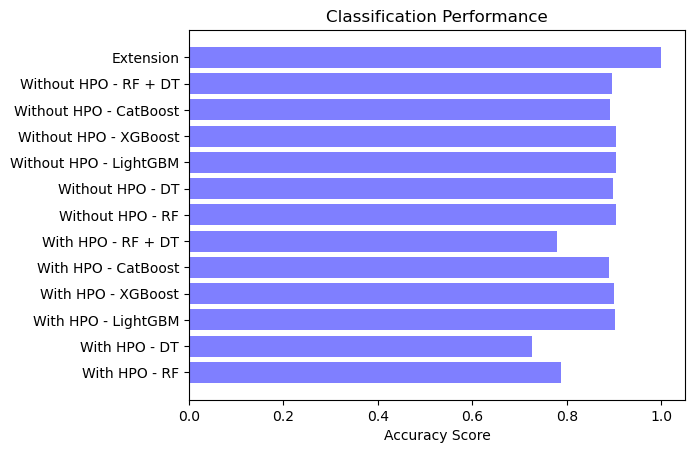

In [55]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

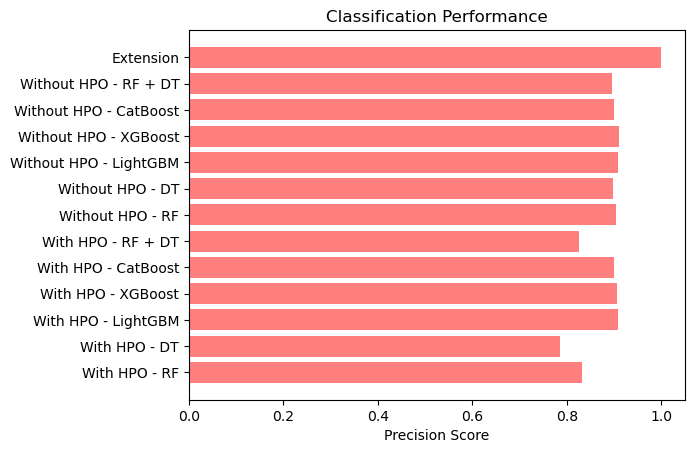

In [56]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

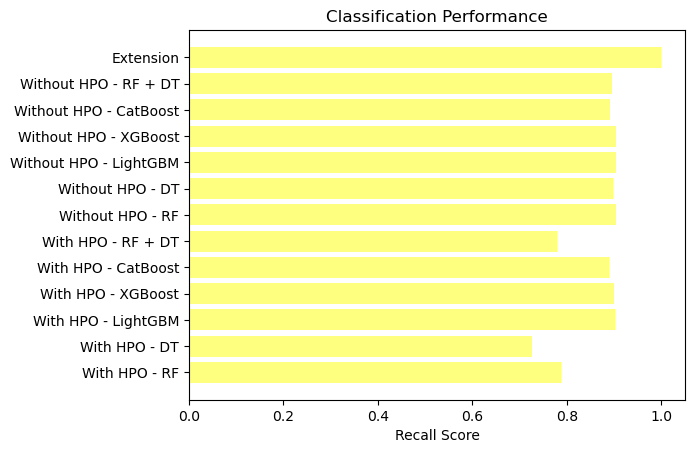

In [57]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

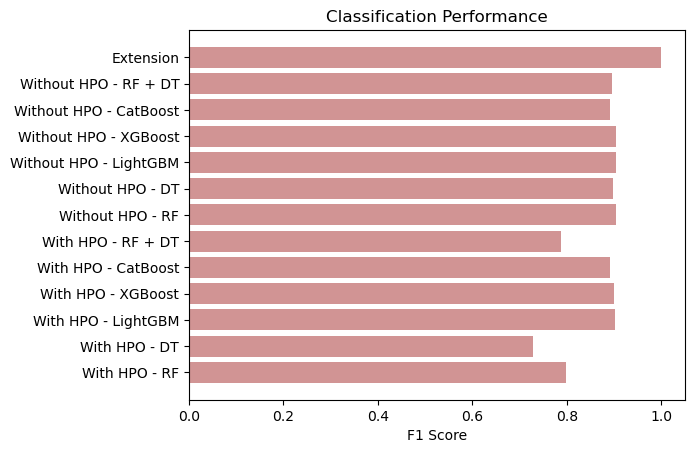

In [58]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()